<a href="https://colab.research.google.com/github/ratimayy/ML/blob/main/ML_6610422001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pickle

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/ratimayy/ML/main/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [18]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [19]:
df2 = df.replace({"mainroad":{"yes": 1,"no":0},
                 "guestroom":{"yes": 1,"no":0},
                 "basement":{"yes": 1,"no":0},
                 "hotwaterheating":{"yes": 1,"no":0},
                 "airconditioning":{"yes": 1,"no":0},
                 "prefarea":{"yes": 1,"no":0},
                 "furnishingstatus":{"unfurnished": 0,"semi-furnished": 1, "furnished": 2}})
df2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [20]:
X = df2.iloc[:,1:13]
y = df2.iloc[:,0]

# Split data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("x")
print(X)

print("y")
print(y)

x
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0            

In [21]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [22]:
#find coef
reg.coef_

array([2.35848772e+02, 7.85744924e+04, 1.09711727e+06, 4.06223164e+05,
       3.66824192e+05, 2.33146766e+05, 3.93159779e+05, 6.87881311e+05,
       7.85550579e+05, 2.25756514e+05, 6.29901661e+05, 2.10397118e+05])

In [23]:
#find intercept
reg.intercept_

-127711.16739244293

In [24]:
y_predict = reg.predict(X_test)
print(y_predict)

[5203691.70963178 7257004.02115475 3062828.59668171 4559591.65374424
 3332932.30559782 3563080.67918997 5645466.31219972 6413979.66873635
 2755831.54819    2668938.66075228 9570600.29915353 2827431.50860062
 3195686.2583409  3352263.99438471 3713879.49996131 5301088.24435749
 2987920.2666968  4810799.8212371  4383031.70489929 3525092.18938646
 5796259.50068013 5840000.70299301 2760214.608641   4762590.14920608
 5204755.73895206 7515542.71619024 3254681.68956382 5236164.45964444
 8178523.16820284 3434166.15675649 6443921.58767581 3346004.77919184
 6742324.74004133 4154936.84088665 3589152.47491253 5788125.92515322
 4768370.18154076 4391684.04193171 3217657.04549935 4638196.61928878
 4522160.27786714 3541284.06127245 7238136.1194117  4021515.68926614
 3701978.76822757 4298879.55563098 6705004.0206061  3993466.52296896
 3798185.05328059 3451821.5624289  7293996.86867461 2832905.26972678
 4378698.1476993  4468002.85418353 3714623.89765883 2718466.90282779
 7524449.64983626 2950437.1495281 

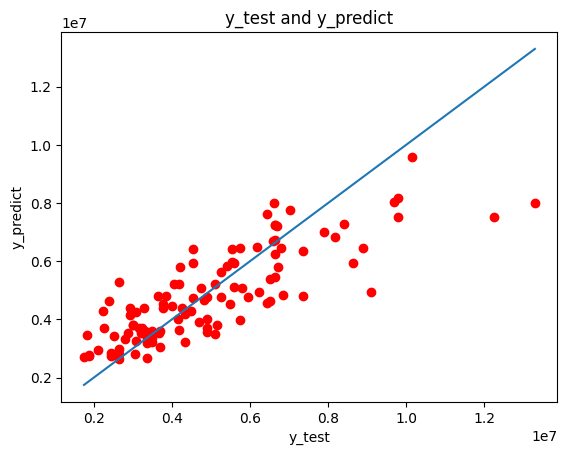

In [25]:
plt.scatter(y_test, y_predict, color = 'red')

plt.title('y_test and y_predict')
plt.xlabel('y_test')
plt.ylabel('y_predict')

x_point = np.linspace(min(y_test),max(y_test),10) #ขอบเขตของเส้น
y_point = x_point
plt.plot(x_point,y_point)
plt.show()


In [26]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_predict)

# Display the result
print(f"Mean Squared Error:, {mse:,.4f}")




Mean Squared Error:, 1,771,751,116,594.0352


In [27]:
"""Deploy"""
print("Deploy")
pickle.dump(reg, open('ml_6610422001.sav','wb') )
from google.colab import files
files.download('ml_6610422001.sav')

Deploy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>